<a href="https://colab.research.google.com/github/Dammyjosh/ASP.NET-Flight-Booking-Web-Application/blob/master/Forex_Exchange_rate_(Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Load the newly uploaded CSV file
import pandas as pd
csv_file_path = '/content/Foreign_Exchange_Rates 2(in).csv'
df = pd.read_csv(csv_file_path)

# Display the first few rows and general info
df.head(), df.info()

df.drop(columns='Unnamed: 0', inplace=True)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Unnamed: 0                                 5217 non-null   int64 
 1   Time Serie                                 5217 non-null   object
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object
 3   EURO AREA - EURO/US$                       5217 non-null   object
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object
 6   BRAZIL - REAL/US$                          5217 non-null   object
 7   CANADA - CANADIAN DOLLAR/US$               5216 non-null   object
 8   CHINA - YUAN/US$                           5217 non-null   object
 9   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object
 10  INDIA - INDIAN RUPEE/US$            

,0
Time Serie,0
AUSTRALIA - AUSTRALIAN DOLLAR/US$,0
EURO AREA - EURO/US$,0
NEW ZEALAND - NEW ZELAND DOLLAR/US$,0
UNITED KINGDOM - UNITED KINGDOM POUND/US$,0
BRAZIL - REAL/US$,0
CANADA - CANADIAN DOLLAR/US$,1
CHINA - YUAN/US$,0
HONG KONG - HONG KONG DOLLAR/US$,0
INDIA - INDIAN RUPEE/US$,0


In [16]:
df['Time Serie'] = pd.to_datetime(df['Time Serie'], errors='coerce', format='mixed', dayfirst=True)
df = df.dropna(subset=['Time Serie']) # Drop rows where Time Serie is NaT after coercion
df = df.sort_values('Time Serie')
df.set_index('Time Serie', inplace=True) # Explicitly set 'Time Serie' as index

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.fillna(method='ffill', inplace=True)  # forward fill

In [17]:
print(df.describe())


       AUSTRALIA - AUSTRALIAN DOLLAR/US$  EURO AREA - EURO/US$  \
count                        5217.000000           5217.000000   
mean                            1.332284              0.844061   
std                             0.269792              0.126685   
min                             0.906900              0.624600   
25%                             1.115800              0.751100   
50%                             1.311500              0.815800   
75%                             1.430600              0.900300   
max                             2.071300              1.209200   

       NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
count                          5217.000000   
mean                              1.543651   
std                               0.337116   
min                               1.134600   
25%                               1.323600   
50%                               1.442600   
75%                               1.591100   
max                               2.5

**Exploratory Data Analysis**


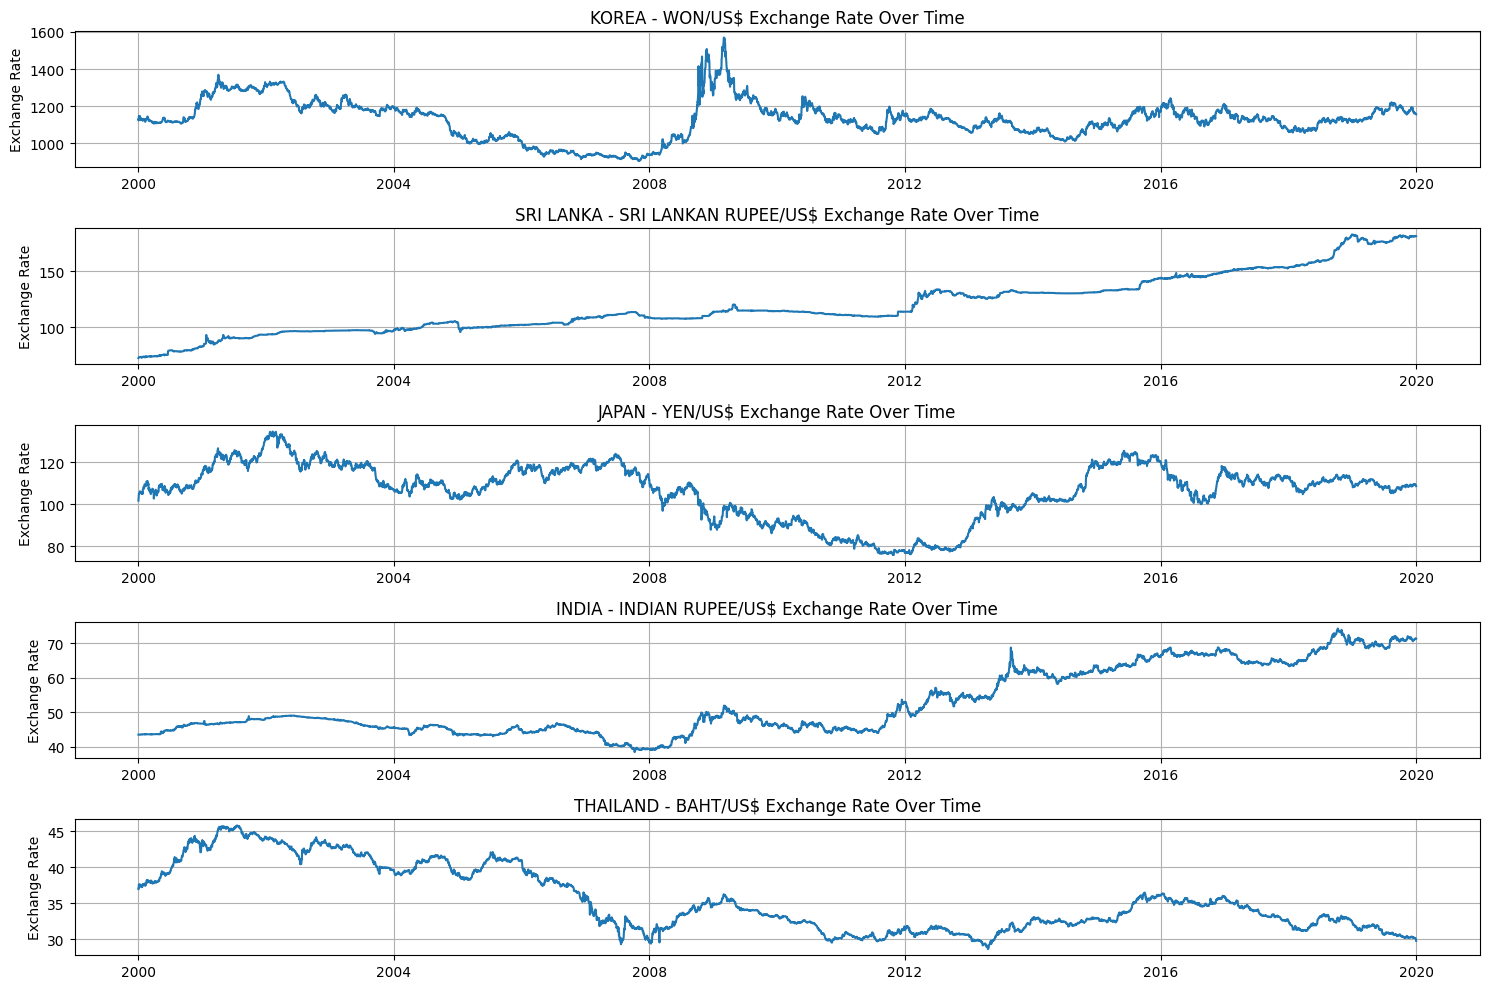

In [18]:
# prompt: plot one plot for each top 5 currency

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average exchange rate for each currency
average_rates = df.mean().sort_values(ascending=False)

# Get the top 5 currencies based on average exchange rate
top_5_currencies = average_rates.head(5).index.tolist()

# Plot each of the top 5 currencies individually
plt.figure(figsize=(15, 10))

for i, currency in enumerate(top_5_currencies):
    plt.subplot(5, 1, i + 1) # Create a subplot for each currency
    sns.lineplot(data=df, x=df.index, y=currency)
    plt.title(f'{currency} Exchange Rate Over Time')
    plt.ylabel('Exchange Rate')
    plt.xlabel('') # Remove x-label from subplots for better readability
    plt.grid(True)

plt.tight_layout()
plt.show()

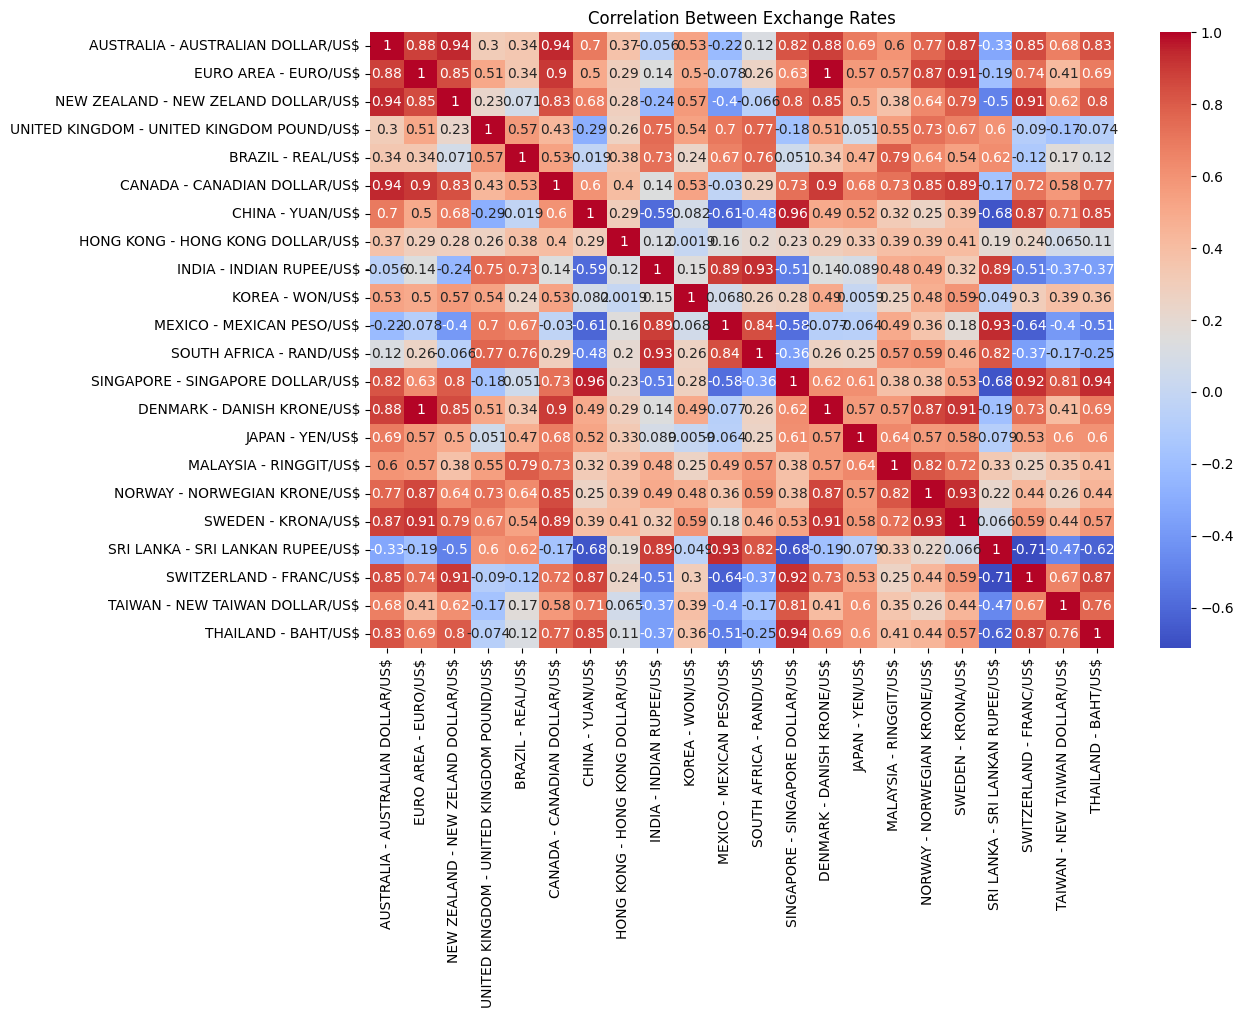

In [19]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Exchange Rates')
plt.show()


In [ ]:
# ✅ Key Observations

# 🔴 Strong Positive Correlations
# EUR/USD, DKK/USD, SEK/USD, CHF/USD:

# These European currencies are highly correlated (r > 0.85 to 0.97).

# Likely due to regional economic ties, similar monetary policies, or central bank coordination.

# AUD/USD and NZD/USD:

# Very high correlation (r ≈ 0.94): Australia and New Zealand economies are closely linked, leading to synchronized currency movements.

# NOK/USD (Norwegian Krone), SEK/USD (Swedish Krona), and EUR/USD:

# Also highly correlated with each other and the Euro, likely due to European market dependence.


# 🔵 Low or Negative Correlations
# INR/USD (Indian Rupee), LKR/USD (Sri Lankan Rupee):

# Low or slightly negative correlation with Western or East Asian currencies, reflecting regional economic independence or differing policy responses.

# ZAR/USD (South African Rand) shows:

# Weak correlation with most other currencies (r < 0.3), suggesting higher volatility or country-specific economic drivers.

# CNY/USD (Chinese Yuan):

# Low to moderate correlation with most others — likely due to China’s tightly managed exchange rate regime.


# 🔁 Symmetry
# The matrix is symmetric — correlations are mirrored across the diagonal.

# Diagonal values are all 1 because each currency is perfectly correlated with itself.


# 🧠 Insights
# ✅ Currency pairs that move together: Good for hedging or multi-currency portfolio design.

# ❌ Low correlation pairs: Useful for diversification or arbitrage strategies.

# 📈 Groupings: We can cluster regions with high internal correlations (like Nordic or Eurozone currencies).





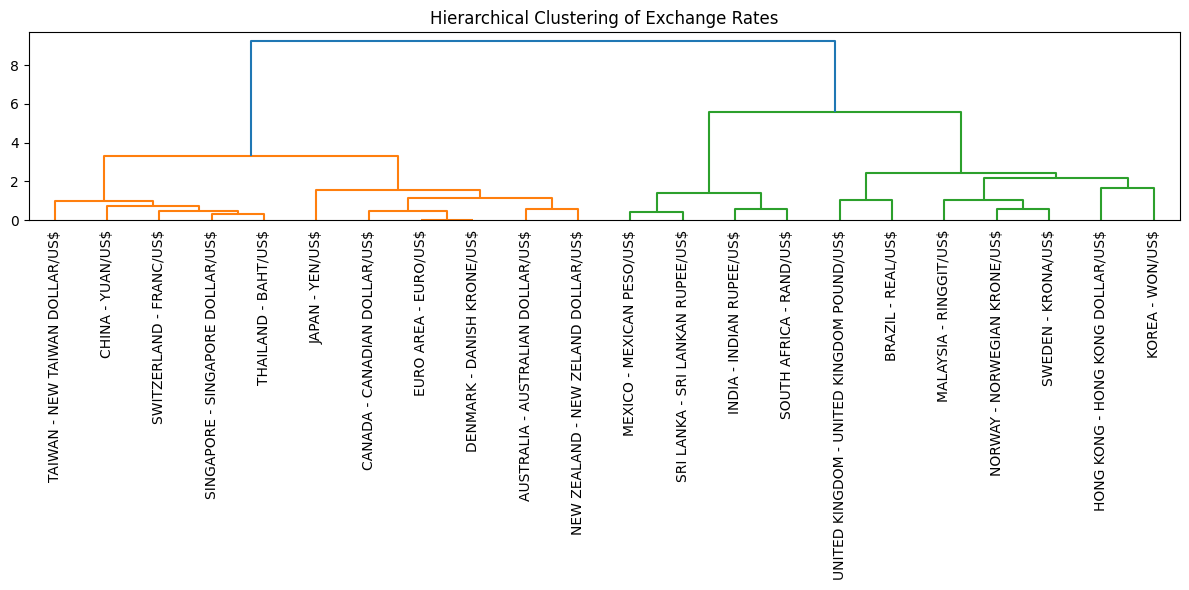

In [20]:
#1. Cluster Currencies by Correlation

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Hierarchical clustering
linkage_matrix = linkage(corr_matrix, method='ward')

# Dendrogram plot
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=corr_matrix.columns, leaf_rotation=90)
plt.title("Hierarchical Clustering of Exchange Rates")
plt.tight_layout()
plt.show()
